In [1]:
import mne 
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as op


In [3]:
import trainer
import config

/home/james/miniconda3/envs/mne/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
conf = config.Config()

result = trainer.main(conf)

Extracting parameters from /mnt/a/MainFolder/Neural Nirvana/Data/sub-02/eeg/sub-02_task-rsvp_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 3227279  =      0.000 ...  3227.279 secs...
Creating RawArray with float64 data, n_channels=65, n_times=50001
    Range : 0 ... 50000 =      0.000 ...    50.000 secs
Ready.
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 95 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 95.00 Hz
-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s


6 bad epochs dropped
<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 128 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 5.0 Hz
 lowpass: 95.0 Hz
 meas_date: 2019-05-08 09:41:58 UTC
 nchan: 128
 projs: Average EEG reference: off
 sfreq: 1000.0 Hz
>
(408, 128, 641)


In [6]:
# convert the result dict into a dataframe
import pandas as pd
df = pd.DataFrame(result)

In [7]:
df.head(40)

,epoch,mask_ratio,correlation,mse
0,0,0.000,0.563965,0.002736
1,0,0.100,0.492554,0.003013
2,0,0.200,0.494566,0.003107
3,0,0.300,0.522413,0.003106
4,0,0.400,0.558833,0.003050
5,0,0.500,0.596377,0.002987
6,0,0.600,0.633382,0.002881
7,0,0.650,0.646799,0.002813
8,0,0.675,0.651005,0.002800
9,0,0.700,0.652294,0.002784


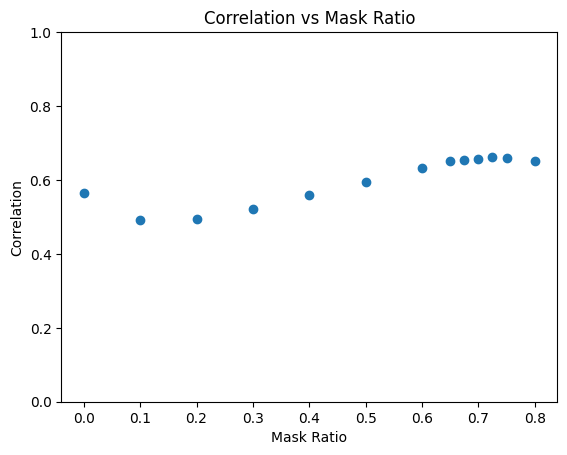

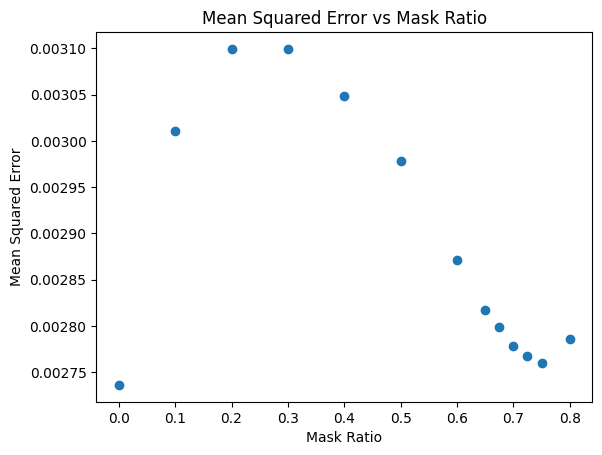

In [8]:
#plot the change in mse with the change in mask ratio

P_1 = df[df['mask_ratio'] == 1.0]
p_0 = df[df['mask_ratio'] == 0.0]
p_01 = df[df['mask_ratio'] == 0.1]
p_02 = df[df['mask_ratio'] == 0.2]
p_03 = df[df['mask_ratio'] == 0.3]
p_04 = df[df['mask_ratio'] == 0.4]
p_05 = df[df['mask_ratio'] == 0.5]
p_06 = df[df['mask_ratio'] == 0.6]
p_065 = df[df['mask_ratio'] == 0.65]
p_0675 = df[df['mask_ratio'] == 0.675]

p_07 = df[df['mask_ratio'] == 0.7]
p_0725 = df[df['mask_ratio'] == 0.725]
p_075 = df[df['mask_ratio'] == 0.75]
p_08 = df[df['mask_ratio'] == 0.8]
p_09 = df[df['mask_ratio'] == 0.9]

#average the mse for each mask ratio
mse_1 = np.mean(P_1['mse'])
mse_0 = np.mean(p_0['mse'])
mse_01 = np.mean(p_01['mse'])
mse_02 = np.mean(p_02['mse'])
mse_03 = np.mean(p_03['mse'])
mse_04 = np.mean(p_04['mse'])
mse_05 = np.mean(p_05['mse'])
mse_06 = np.mean(p_06['mse'])
mse_065 = np.mean(p_065['mse'])
mse_0675 = np.mean(p_0675['mse'])
mse_07 = np.mean(p_07['mse'])
mse_0725 = np.mean(p_0725['mse'])
mse_075 = np.mean(p_075['mse'])
mse_08 = np.mean(p_08['mse'])
mse_09 = np.mean(p_09['mse'])

cor_1 = np.mean(P_1['correlation'])
cor_0 = np.mean(p_0['correlation'])
cor_01 = np.mean(p_01['correlation'])
cor_02 = np.mean(p_02['correlation'])
cor_03 = np.mean(p_03['correlation'])
cor_04 = np.mean(p_04['correlation'])
cor_05 = np.mean(p_05['correlation'])
cor_06 = np.mean(p_06['correlation'])
cor_065 = np.mean(p_065['correlation'])
cor_0675 = np.mean(p_0675['correlation'])
cor_07 = np.mean(p_07['correlation'])
cor_0725 = np.mean(p_0725['correlation'])
cor_075 = np.mean(p_075['correlation'])
cor_08 = np.mean(p_08['correlation'])
cor_09 = np.mean(p_09['correlation'])

#plot the correlation for each mask ratio
#plt.plot([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], [cor_0, cor_01, cor_02, cor_03, cor_04, cor_05, cor_06, cor_07, cor_08, cor_09, cor_1])
#plot as points, and plot all the points
plt.scatter([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.65,0.675, 0.7, 0.725, 0.75, 0.8, 0.9], [cor_0, cor_01, cor_02, cor_03, cor_04, cor_05, cor_06, cor_065, cor_0675, cor_07, cor_0725, cor_075, cor_08, cor_09])
#adjust y axis to show the full range of correlation values
plt.ylim(0,1)


plt.xlabel('Mask Ratio')
plt.ylabel('Correlation')
plt.title('Correlation vs Mask Ratio')
plt.show()


#plot the mse for each mask ratio
plt.scatter([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.65,0.675, 0.7, 0.725, 0.75, 0.8, 0.9], [mse_0, mse_01, mse_02, mse_03, mse_04, mse_05, mse_06, mse_065, mse_0675, mse_07, mse_0725, mse_075, mse_08, mse_09])
plt.xlabel('Mask Ratio')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Mask Ratio')
plt.show()
